In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
mls=pd.read_csv("/content/drive/MyDrive/WUSTL/Deep learning/Final project/mls-sample.csv")

In [326]:
mls.head()

,id,street,city,state,zip,county,beds,baths_full,baths_half,description,listing_date,list_price,sqft,lotsize_sqft,property_type,school_district,subdivision,lat,lng,year_built,features_appliances_and_equipment,features_bathrooms,features_bedrooms,features_community,features_dining_room,features_doors,features_energy_saving,features_exterior_features,features_fence,features_fireplaces,features_foundation,features_fees,features_garage,features_heating,features_home_owners_association,features_house,features_interior,features_interior_features,features_kitchen,features_laundry,features_location,features_lot,features_miscellaneous,features_parking,features_pool,features_property,features_property_access,features_roof,features_schools,features_security_system,features_sewer,features_spa,features_taxes,features_water,features_amenities,features_disclosures,features_utilities,features_windows_and_doors,xf_attributes,photo_urls
0,1,115 Kings Ridge Dr,Peachtree City,GA,30269,Peachtree City,4,2,0,This Peachtree City two-story home offers a pa...,2021-04-19 04:00:00+00,271000,1880,13717.0,single family home,NaN,NaN,33.404370,-84.611206,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[""2 garage spaces""]",[],NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"[""Garage Attached""]",[],NaN,NaN,NaN,"[""Elementary school: Kedron"",""Junior high scho...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},"[""https://opendoor2.imgix.net/https%3A%2F%2Fli..."
1,2,3729 Gardenwick Road Unit 15,Powder Springs,GA,30127,Cobb,3,2,1,"Stafford, an eye-catching two-story interior u...",2021-02-15 00:00:00+00,320443,1874,NaN,Townhouse,1,Sweetwater Landing Townhomes,33.863125,-84.695560,2021,NaN,"[""2 full bathrooms"",""2 full bathrooms on upper...","[""3 bedrooms"",""3 bedrooms on upper level"",""Ove...",NaN,"[""Ceiling Fan(s)"",""Central Air"",""Window Unit(s...",NaN,NaN,NaN,NaN,"[""1 fireplace"",""Factory Built"",""Family Room""]",NaN,NaN,NaN,"[""Electric"",""Zoned""]","[""Association Fee: $135"",""Association Fee Freq...","[""Architecture: Traditional"",""Built in 2021"",""...",NaN,"[""Entrance Foyer"",""Double Vanity"",""High Ceilin...","[""Eat-in Kitchen"",""Kitchen Island"",""Pantry"",""P...","[""In Hall"",""Laundry Room"",""Upper Floor""]",NaN,"[""Lot: Not Available"",""Back Yard"",""Front Yard""...",NaN,"[""Attached"",""Driveway"",""Garage"",""Garage Faces ...","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Powder Springs"",""Middle S...",NaN,"[""Public Sewer""]",NaN,"[""Year: 2020""]","[""Public""]",NaN,NaN,"[""Utilities available: Cable Available,Electri...",NaN,"{""xf_city"":""Powder Springs"",""xf_roof"":[""Compos...","[""https://listing-images.homejunction.com/fmls..."
2,3,2117 Green Gate Place,Grayson,GA,30017,Gwinnett,3,2,0,This Grayson one-story cul-de-sac home offers ...,2021-04-19 00:00:00+00,296000,1664,30056.0,Single Family Residence,5th,GRAYSON MEADOWS,33.900326,-83.943580,1996,NaN,"[""2 full bathrooms""]","[""3 bedrooms"",""3 bedrooms on main level"",""Mast...",NaN,"[""Central Air""]",NaN,NaN,NaN,NaN,"[""1 fireplace"",""Gas Starter"",""Other Room""]",NaN,NaN,NaN,"[""Natural Gas""]",NaN,"[""Architecture: Other"",""Built in 1996"",""Loft"",...",NaN,NaN,NaN,NaN,NaN,"[""Approximate Lot Size: 0.6900"",""Dimensions: x...",NaN,"[""Garage""]","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Grayson"",""Middle School: ...",NaN,"[""Septic Tank""]",NaN,"[""$2,924"",""Year: 2020""]","[""Public""]",NaN,NaN,"[""Utilities available: Electricity Available""]",NaN,"{""xf_city"":""Grayson"",""xf_roof"":[""Composition""]...","[""https://listing-images.homejunction.com/fmls..."
3,4,4311 Wellbrook Court,Douglasville,GA,30135,Douglas,4,2,1,This Douglasville two-story cul-de-sac home of...,2021-01-22 00:00:00+00,315000,2212,15241.0,Single Family Residence,1,WATERFORD PARK,33.707146,-84.718130,1994,NaN,"[""2 full bathrooms"",""2 full bathrooms on upper...","[""4 bedrooms"",""4 bedrooms on upper level""]",NaN,"

In [327]:
#clean data for modelling
mls_model=mls[['list_price','lotsize_sqft','zip','beds','baths_full','baths_half','sqft','property_type','year_built','description']]

In [328]:
mls_model['property_type'].unique()

array(['single family home', 'Townhouse', 'Single Family Residence',
       'Condominium', 'townhouse', 'condo'], dtype=object)

In [329]:
# merge similar property type
mls_model['property_type']=np.where(mls_model['property_type']=='Single Family Residence','single family home',mls_model['property_type'])
mls_model['property_type']=np.where(mls_model['property_type']=='Condominium','condo',mls_model['property_type'])
mls_model['property_type']=np.where(mls_model['property_type']=='Condominium','condo',mls_model['property_type'])
mls_model['property_type']=np.where(mls_model['property_type']=='Townhouse','townhouse',mls_model['property_type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [330]:
mls_model['property_type'].unique()

array(['single family home', 'townhouse', 'condo'], dtype=object)

In [331]:
mls_model.info

<bound method DataFrame.info of       list_price  ...                                        description
0         271000  ...  This Peachtree City two-story home offers a pa...
1         320443  ...  Stafford, an eye-catching two-story interior u...
2         296000  ...  This Grayson one-story cul-de-sac home offers ...
3         315000  ...  This Douglasville two-story cul-de-sac home of...
4         188800  ...  This renovated unit is completely turn-key wit...
...          ...  ...                                                ...
8163      379900  ...  FOUR SIDED BRICK HOME in desirable Tucker area...
8164      389900  ...  Real Living in Atlanta! This recently renovate...
8165      350000  ...  The ultimate quarantine destination. This beau...
8166      354999  ...  Estates at Ellis Wade! Snuggled among custom b...
8167      383900  ...  NEW CONSTRUCTION PRE-SALE! This custom Jackson...

[8168 rows x 10 columns]>

In [332]:
mls_model_clean=mls_model.dropna()

In [333]:
mls_model_clean.info

<bound method DataFrame.info of       list_price  ...                                        description
0         271000  ...  This Peachtree City two-story home offers a pa...
2         296000  ...  This Grayson one-story cul-de-sac home offers ...
3         315000  ...  This Douglasville two-story cul-de-sac home of...
4         188800  ...  This renovated unit is completely turn-key wit...
5         310000  ...  *Back on the market due to buyer cold feet* D;...
...          ...  ...                                                ...
8163      379900  ...  FOUR SIDED BRICK HOME in desirable Tucker area...
8164      389900  ...  Real Living in Atlanta! This recently renovate...
8165      350000  ...  The ultimate quarantine destination. This beau...
8166      354999  ...  Estates at Ellis Wade! Snuggled among custom b...
8167      383900  ...  NEW CONSTRUCTION PRE-SALE! This custom Jackson...

[7222 rows x 10 columns]>

In [334]:
mls_model_clean.head()

,list_price,lotsize_sqft,zip,beds,baths_full,baths_half,sqft,property_type,year_built,description
0,271000,13717.0,30269,4,2,0,1880,single family home,1973,This Peachtree City two-story home offers a pa...
2,296000,30056.0,30017,3,2,0,1664,single family home,1996,This Grayson one-story cul-de-sac home offers ...
3,315000,15241.0,30135,4,2,1,2212,single family home,1994,This Douglasville two-story cul-de-sac home of...
4,188800,723.0,30308,1,1,0,722,condo,1962,This renovated unit is completely turn-key wit...
5,310000,997.0,30341,2,2,1,1343,condo,2020,*Back on the market due to buyer cold feet* D;...


In [335]:
# Categorical -> dummy variables
mls_model_clean=pd.concat([mls_model_clean,pd.get_dummies(mls_model_clean.zip)],axis=1)
mls_model_clean=pd.concat([mls_model_clean,pd.get_dummies(mls_model_clean.property_type)],axis=1)


# Drop the columns
mls_model_clean.drop(["zip","property_type"],axis=1,inplace=True)

In [336]:
mls_model_clean.head()

,list_price,lotsize_sqft,beds,baths_full,baths_half,sqft,year_built,description,22578,30002,30004,30005,30008,30009,30011,30012,30013,30014,30015,30016,30017,30019,30021,30022,30024,30025,30028,30030,30032,30033,30034,30035,30038,30039,30040,30041,30043,30044,30045,30046,...,31029,31032,31052,31061,31064,31087,31088,31093,31201,31204,31206,31210,31211,31217,31220,31324,31331,31401,31419,31510,31520,31639,31707,31721,31735,31791,31811,31822,31826,31830,31904,31906,31907,35959,36264,39823,39854,condo,single family home,townhouse
0,271000,13717.0,4,2,0,1880,1973,This Peachtree City two-story home offers a pa...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,296000,30056.0,3,2,0,1664,1996,This Grayson one-story cul-de-sac home offers ...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,315000,15241.0,4,2,1,2212,1994,This Douglasville two-story cul-de-sac home of...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,188800,723.0,1,1,0,722,1962,This renovated unit is completely turn-key wit...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,310000,997.0,2,2,1,1343,2020,*Back on the market due to buyer cold feet* D;...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [337]:
# Min-max scaling
for col in mls_model_clean.columns[:7]:
    mls_model_clean.loc[:,col]=(mls_model_clean.loc[:,col]-mls_model_clean.loc[:,col].min())/(mls_model_clean.loc[:,col].max()-mls_model_clean.loc[:,col].min())

In [338]:
mls_model_clean.head()

,list_price,lotsize_sqft,beds,baths_full,baths_half,sqft,year_built,description,22578,30002,30004,30005,30008,30009,30011,30012,30013,30014,30015,30016,30017,30019,30021,30022,30024,30025,30028,30030,30032,30033,30034,30035,30038,30039,30040,30041,30043,30044,30045,30046,...,31029,31032,31052,31061,31064,31087,31088,31093,31201,31204,31206,31210,31211,31217,31220,31324,31331,31401,31419,31510,31520,31639,31707,31721,31735,31791,31811,31822,31826,31830,31904,31906,31907,35959,36264,39823,39854,condo,single family home,townhouse
0,0.023967,0.000048,0.190476,0.086957,0.000000,0.013603,0.779279,This Peachtree City two-story home offers a pa...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.026263,0.000106,0.142857,0.086957,0.000000,0.012040,0.882883,This Grayson one-story cul-de-sac home offers ...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.028007,0.000054,0.190476,0.086957,0.166667,0.016005,0.873874,This Douglasville two-story cul-de-sac home of...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.016419,0.000002,0.047619,0.043478,0.000000,0.005224,0.729730,This renovated unit is completely turn-key wit...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.027548,0.000003,0.095238,0.086957,0.166667,0.009717,0.990991,*Back on the market due to buyer cold feet* D;...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [378]:
# Split for training, validation and testing set
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(mls_model_clean.iloc[:,1:], mls_model_clean.list_price, train_size =0.6)
X_test, X_validate, y_test, y_validate = train_test_split(X_tmp, y_tmp, train_size = 0.5)

print("Train/Validation/Test data size: {}, {}, {}"\
      .format(X_train.shape[0],X_validate.shape[0],X_test.shape[0]))

Train/Validation/Test data size: 4333, 1445, 1444


In [379]:
X_train.head()

,lotsize_sqft,beds,baths_full,baths_half,sqft,year_built,description,22578,30002,30004,30005,30008,30009,30011,30012,30013,30014,30015,30016,30017,30019,30021,30022,30024,30025,30028,30030,30032,30033,30034,30035,30038,30039,30040,30041,30043,30044,30045,30046,30047,...,31029,31032,31052,31061,31064,31087,31088,31093,31201,31204,31206,31210,31211,31217,31220,31324,31331,31401,31419,31510,31520,31639,31707,31721,31735,31791,31811,31822,31826,31830,31904,31906,31907,35959,36264,39823,39854,condo,single family home,townhouse
5561,0.000036,0.142857,0.086957,0.000000,0.011005,0.797297,This Mableton one-story home offers granite co...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8041,0.000046,0.142857,0.086957,0.000000,0.009949,0.707207,"Walk into your quaint,4 sided brick, mid-centu...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
226,0.000046,0.190476,0.173913,0.000000,0.028942,0.990991,New Construction In LaVista Park Ready To Rent...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
129,0.000044,0.142857,0.086957,0.166667,0.011808,0.810811,Move right in to this fantastic home situated ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6098,0.001846,0.238095,0.130435,0.000000,0.071748,0.909910,Escape to your own 12 acres suited for casual ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [380]:
import re
def preprocess_text(sen):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [381]:
X1_train = []
sentences = list(X_train["description"])
for sen in sentences:
    X1_train.append(preprocess_text(sen))

In [382]:
X1_validate = []
sentences = list(X_validate["description"])
for sen in sentences:
    X1_validate.append(preprocess_text(sen))

In [383]:
X1_test = []
sentences = list(X_test["description"])
for sen in sentences:
    X1_test.append(preprocess_text(sen))

In [384]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

max_features = 10000
maxlen = 80

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_validate = tokenizer.texts_to_sequences(X1_validate)
X1_test = tokenizer.texts_to_sequences(X1_test)


X1_train = pad_sequences(X1_train, maxlen=maxlen)
X1_validate = pad_sequences(X1_validate, maxlen=maxlen)
X1_test = pad_sequences(X1_test, maxlen=maxlen)

In [385]:
X1_train_df = pd.DataFrame(X1_train)
X1_train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2561,49,35,6,31,36,54,2,18,44,28
1,143,578,263,4,223,15,50,30,68,4,53,2346,439,217,7,30,351,698,60,58,4,357,162,278,2,109,2847,3,33,2192,364,69,217,305,189,5,37,16,32,9,263,4,45,263,13,2,68,478,471,4,15,193,54,2,681,13,319,4,267,126,57,3,104,185,140,5,87,15,190,2,15,4966,4967,228,167,150,7,365,145,4968
2,0,0,15,188,5,2562,90,137,7,828,55,931,4,1023,1206,399,8,194,579,25,6,31,400,528,10,129,504,286,2,129,79,57,1520,206,50,353,76,994,213,19,12,22,44,28,899,354,12,994,10,116,2,1821,392,9,120,1083,399,4,541,3250,4,3251,5,428,18,55,1023,1206,1024,10,18,428,3840,1023,1207,734,3841,1302,5,3252
3,415,6,322,5,543,4969,2347,41,1266,7,71,5,365,600,5,119,229,6,4,340,641,60,58,57,22,25,74,20,2,29,220,96,13,4,154,82,64,39,2,193,196,95,300,32,9,4,3253,7,116,2,42,124,112,40,429,298,16,242,43,96,160,2,16,30,47,4,358,682,173,15,190,15,272,15,28,217,15,39,397,101
4,67,14,448,3,339,27,2,440,25,104,3,20,53,2055,83,18,995,2,508,213,220,12,467,25,944,3,22,25,4970,7,98,4,29,9,14,945,1937,1084,34,14,16,32,1025,3842,1938,9,63,119,63,564,829,14,996,3250,3,85,11,119,322,170,3,490,287,63,7,2349,3,260,61,340,3843,3,16,353,932,166,71,316,14,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,0,0,0,0,0,0,0,0,0,0,0,0,235,21,211,5,137,35,253,5,3,187,10,859,1578,163,2606,221,584,376,248,297,7,1627,157,130,2,596,462,426,1406,51,298,4,60,58,2,599,624,57,425,13,4,36,54,104,442,64,39,2,38,5,147,402,79,5,20,2,29,9,4,125,7,635,77,28,1009,12,22,25
4329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1906,3,44,8,33,367,285,86,107,12,195,664,228,247,11,598,14,24,8,6,1417,43,114,16,32,9,4,74,20,9,287,234,11,174,10,9,14,3,677,32,266,105,3,1699,12,3,113,320,275,5,67,66,14,1791,583,8,49,631,383,349
4330,1157,90,12,42,155,4,93,120,47,12,3,22,25,4,18,50,160,2,173,95,300,222,13,4,154,82,337,54,214,10,3,580,64,39,147,2,552,142,4,464,452,569,1872,99,9,132,20,9,2,29,9,305,380,4,45,51,41,9,4,402,100,45,920,83,59,466,2,8176,29,34,199,23,4,42,68,110,246,25,4,23
4331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,889,107,6,12,108,610,83,1775,955,4,1458,2012,8177,3,350,314,424,3,741,409,124,334,3,2335,261,33,521,178,106,8178,917,437,2446,4470,2,3244,124,1220,2479,4403,2,153,3,117,1027,668,111,2,134,243,7,8179,24,819,89,11,133,26,550,227


In [386]:
X2_train = X_train.drop('description', axis=1)
X2_validate = X_validate.drop('description', axis=1)
X2_test = X_test.drop('description', axis=1)

In [387]:
from keras.models import Input
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(323,))

In [388]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Bidirectional


embedding_layer = Embedding(max_features, 64, input_length=maxlen)(input_1)
Layer_1 = Conv1D(64, 5, activation='relu')(embedding_layer)
Layer_2 = Bidirectional(LSTM(32,dropout=0.2,recurrent_dropout=0.2))(Layer_1)

In [389]:
dense_layer_1 = Dense(256,input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer="l2")(input_2)
dense_layer_2 = Dropout(0.15)(dense_layer_1)
dense_layer_3 = Dense(64, activation='relu')(dense_layer_2)

## **Combine**

In [390]:
from keras.models import Model
from keras.layers import Concatenate

concat_layer = Concatenate()([Layer_2, dense_layer_3])
dense_layer_6 = Dense(64, activation='relu')(concat_layer)
dense_layer_7 = Dropout(0.15)(dense_layer_6)
dense_layer_8 = Dense(64, activation='relu')(dense_layer_7)
output = Dense(1, activation='relu')(dense_layer_8)
model = Model(inputs=[input_1, input_2], outputs=output)

In [391]:
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 80)]         0           []                               
                                                                                                  
 input_30 (InputLayer)          [(None, 323)]        0           []                               
                                                                                                  
 embedding_21 (Embedding)       (None, 80, 64)       640000      ['input_29[0][0]']               
                                                                                                  
 dense_121 (Dense)              (None, 256)          82944       ['input_30[0][0]']               
                                                                                           

In [ ]:
model_hist = model.fit([X1_train, X2_train], 
                     y_train, 
                     epochs=20,
                     batch_size=16,
                     validation_data=([X1_validate, X2_validate] , y_validate))

Epoch 1/20
271/271 [==============================] - 55s 179ms/step - loss: 0.3122 - val_loss: 0.0030
Epoch 2/20
271/271 [==============================] - 48s 177ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 3/20
271/271 [==============================] - 48s 179ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 4/20
271/271 [==============================] - 48s 177ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 5/20
271/271 [==============================] - 48s 178ms/step - loss: 7.9684e-04 - val_loss: 0.0028
Epoch 6/20
271/271 [==============================] - 48s 177ms/step - loss: 7.6092e-04 - val_loss: 0.0025
Epoch 7/20
271/271 [==============================] - 48s 178ms/step - loss: 5.7926e-04 - val_loss: 0.0027
Epoch 8/20
226/271 [========================>.....] - ETA: 7s - loss: 3.5260e-04

<function matplotlib.pyplot.imshow>

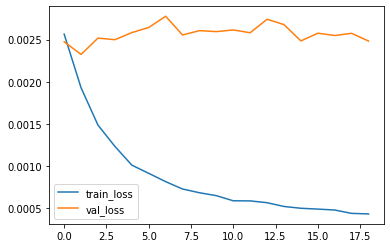

In [356]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(model_hist.history["loss"][1:])
plt.plot(model_hist.history["val_loss"][1:])
plt.legend(["train_loss","val_loss"])
plt.imshow

In [357]:
score = model.evaluate(x=[X1_test, X2_test], y=y_test, verbose=1)
print("Test Score:", score)

46/46 [==============================] - 1s 25ms/step - loss: 0.0028
Test Score: 0.002831791527569294


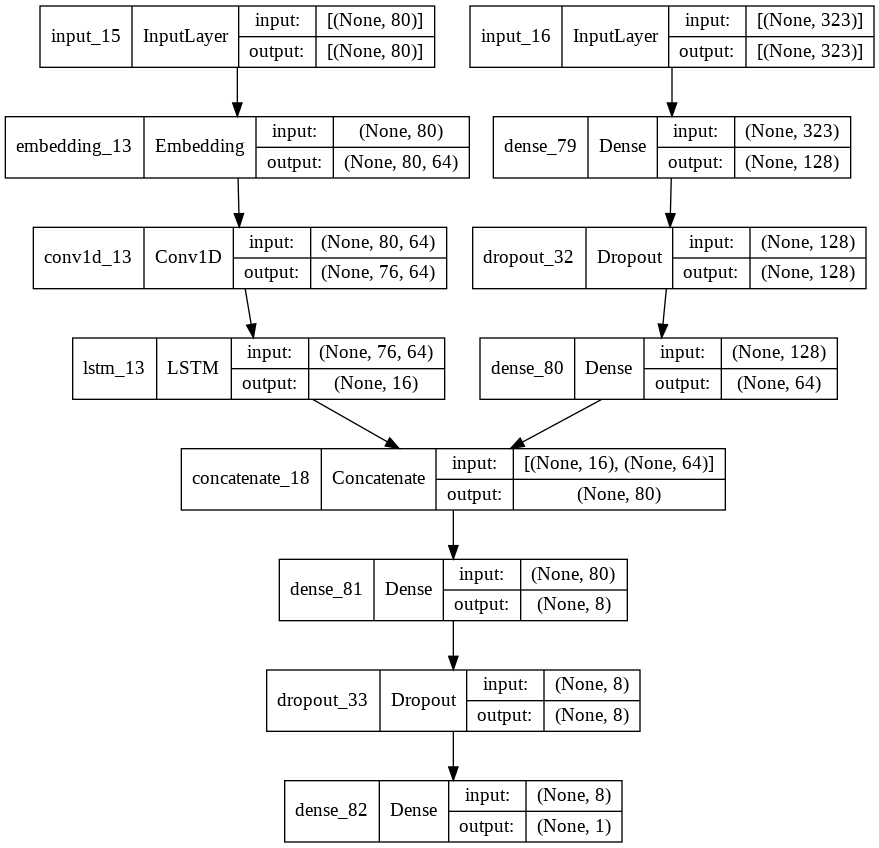

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)